<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/unsupervised_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans




In [ ]:
data = pd.DataFrame({'customer_Id':range(1,11),'annual_Income':[10000,20000,30000,20000,50000,60000,10000,80000,60000,100000],'spending_score':np.random.randint(1,100,size=10)})

In [ ]:
data

,customer_Id,annual_Income,spending_score
0,1,10000,39
1,2,20000,15
2,3,30000,16
3,4,20000,91
4,5,50000,76
5,6,60000,53
6,7,10000,24
7,8,80000,47
8,9,60000,99
9,10,100000,33


In [ ]:
data.drop('customer_Id',axis=1,inplace=True)


In [ ]:
data

,annual_Income,spending_score
0,10000,39
1,20000,15
2,30000,16
3,20000,91
4,50000,76
5,60000,53
6,10000,24
7,80000,47
8,60000,99
9,100000,33


In [ ]:
data1=data.copy()

In [ ]:
data1

,annual_Income,spending_score
0,10000,39
1,20000,15
2,30000,16
3,20000,91
4,50000,76
5,60000,53
6,10000,24
7,80000,47
8,60000,99
9,100000,33


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
for i in data.columns:
    data[i] = scaler.fit_transform(data[[i]])

In [ ]:
data

,annual_Income,spending_score
0,-1.156703,-0.358859
1,-0.816497,-1.195035
2,-0.476290,-1.160194
3,-0.816497,1.452856
4,0.204124,0.930246
5,0.544331,0.128910
6,-1.156703,-0.881469
7,1.224745,-0.080134
8,0.544331,1.731581
9,1.905159,-0.567903


In [ ]:
wcss = []
for i  in range(1,11):
  k_means=KMeans(n_clusters=i,init='k-means++',random_state = 42)
  k_means.fit(data)
  wcss.append(k_means.inertia_)

In [ ]:
wcss

[20.0,
 13.443099165838632,
 3.281923062124327,
 2.326793723674148,
 1.8511444622479023,
 1.4722049133048027,
 0.6409975421337262,
 0.2905565918426892,
 0.05847730643572525,
 0.0]

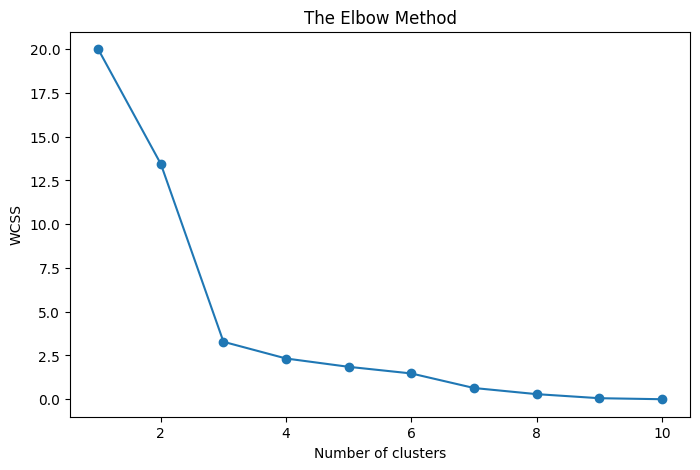

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
model=KMeans(n_clusters=3,init='k-means++',random_state = 42)
y_KMeans = model.fit_predict(data)


In [ ]:
y_KMeans

array([2, 2, 2, 0, 0, 1, 2, 1, 0, 1], dtype=int32)

In [ ]:
data1['cluster']=y_KMeans

In [ ]:
data1

,annual_Income,spending_score,cluster
0,10000,39,2
1,20000,15,2
2,30000,16,2
3,20000,91,0
4,50000,76,0
5,60000,53,1
6,10000,24,2
7,80000,47,1
8,60000,99,0
9,100000,33,1


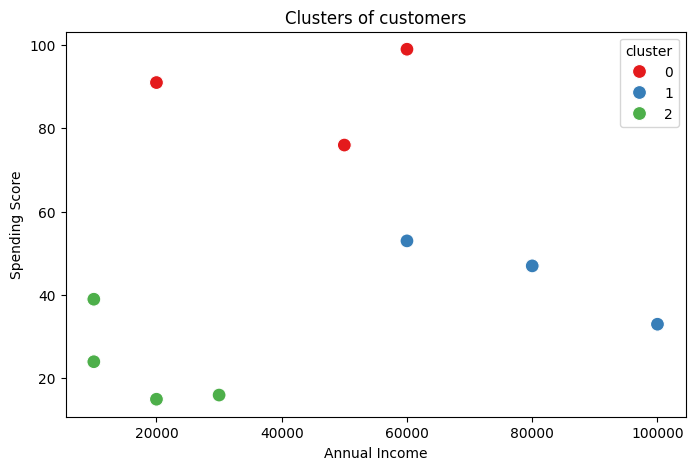

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data1,x='annual_Income',y='spending_score',hue='cluster',palette='Set1',s=100)
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()